# Aggregating columns together based on subcategory

### Pre-process data

#### Note: Importance values are from other notebooks

In [87]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [88]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
from math import sqrt

In [89]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [90]:
df = pd.read_csv(data)

In [91]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Subcategory 1: Main Factors

In [92]:
new_main_df = df[['Id', "SalePrice", "OverallQual", "OverallCond", "LotArea", "YearBuilt", "Street", "LotShape"]]

In [93]:
new_main_df.head()

,Id,SalePrice,OverallQual,OverallCond,LotArea,YearBuilt,Street,LotShape
0,1,208500,7,5,8450,2003,Pave,Reg
1,2,181500,6,8,9600,1976,Pave,Reg
2,3,223500,7,5,11250,2001,Pave,IR1
3,4,140000,7,5,9550,1915,Pave,IR1
4,5,250000,8,5,14260,2000,Pave,IR1


In [94]:
#Feature importance from main_analysis_df
main_importance = pd.DataFrame()
main_importance["variable"] = ['OverallQual', 'LotArea', 'YearBuilt', 'LotShape']
main_importance["importance"] = [76.95991136103147, 18.75558088809967, 3.0246606935231912, 1.2598470573456726]
main_importance

,variable,importance
0,OverallQual,76.959911
1,LotArea,18.755581
2,YearBuilt,3.024661
3,LotShape,1.259847


##### Catboost Normalised RMSE: 0.06657866598719948

### Subcategory 2: Garage Details

In [95]:
garage_df = df[["Id", "SalePrice", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]

In [96]:
garage_df.head()

,Id,SalePrice,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,1,208500,Attchd,2003.0,RFn,2,548,TA,TA
1,2,181500,Attchd,1976.0,RFn,2,460,TA,TA
2,3,223500,Attchd,2001.0,RFn,2,608,TA,TA
3,4,140000,Detchd,1998.0,Unf,3,642,TA,TA
4,5,250000,Attchd,2000.0,RFn,3,836,TA,TA


In [97]:
garage_importance = pd.DataFrame()
garage_importance["variable"] = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
garage_importance["importance"] = [7.0372203818727534, 15.101076654321679, 16.594485367397123, 26.732025422742815, 33.54529737715993, 0.3450221588943238, 0.6448726376113748]
garage_importance

,variable,importance
0,GarageType,7.037220
1,GarageYrBlt,15.101077
2,GarageFinish,16.594485
3,GarageCars,26.732025
4,GarageArea,33.545297
5,GarageQual,0.345022
6,GarageCond,0.644873


##### Catboost Normalised RMSE: 0.09055755195766964

### Subcategory 3: Basement Details

In [98]:
basement_df = df[['Id', "SalePrice", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]

In [99]:
basement_df.head()

,Id,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,1,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
1,2,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,3,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,4,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
4,5,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [100]:
basement_importance = pd.DataFrame()
basement_importance["variable"] = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','TotalBsmtSF']
basement_importance["importance"] = [38.90071168327252, 1.5007923822496567, 8.373343396151819, 7.687886066966812, 43.537266471359175]
basement_importance

,variable,importance
0,BsmtQual,38.900712
1,BsmtCond,1.500792
2,BsmtExposure,8.373343
3,BsmtFinType1,7.687886
4,TotalBsmtSF,43.537266


##### Catboost Normalised RMSE: 0.07761983722416106

### Subcategory 4: Utilities

In [101]:
utilities_df = df[["SalePrice", "Utilities", "Heating", "HeatingQC", "CentralAir", "Electrical", "Fireplaces", "FireplaceQu"]]

In [102]:
utilities_df.head()

,SalePrice,Utilities,Heating,HeatingQC,CentralAir,Electrical,Fireplaces,FireplaceQu
0,208500,AllPub,GasA,Ex,Y,SBrkr,0,NaN
1,181500,AllPub,GasA,Ex,Y,SBrkr,1,TA
2,223500,AllPub,GasA,Ex,Y,SBrkr,1,TA
3,140000,AllPub,GasA,Gd,Y,SBrkr,1,Gd
4,250000,AllPub,GasA,Ex,Y,SBrkr,1,TA


In [103]:
utilities_importance = pd.DataFrame()
utilities_importance["variable"] = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu']
utilities_importance["importance"] = [1.4827008116357552, 39.684940887098975, 2.595176412575824, 5.262203287408806, 11.978141353196063, 38.99683724808456]
utilities_importance

,variable,importance
0,Heating,1.482701
1,HeatingQC,39.684941
2,CentralAir,2.595176
3,Electrical,5.262203
4,Fireplaces,11.978141
5,FireplaceQu,38.996837


##### Catboost Normalised RMSE: 0.09698163274687885

### Subcategory 5: Miscellaneous

In [104]:
misc_df = df[["SalePrice", "MoSold", "YrSold", "SaleType", "SaleCondition", "Condition1", "Condition2"]]

In [105]:
misc_df.head()

,SalePrice,MoSold,YrSold,SaleType,SaleCondition,Condition1,Condition2
0,208500,2,2008,WD,Normal,Norm,Norm
1,181500,5,2007,WD,Normal,Feedr,Norm
2,223500,9,2008,WD,Normal,Norm,Norm
3,140000,2,2006,WD,Abnorml,Norm,Norm
4,250000,12,2008,WD,Normal,Norm,Norm


In [106]:
misc_importance = pd.DataFrame()
misc_importance["variable"] = ["MoSold", "YrSold", "SaleType", "SaleCondition", "Condition1", "Condition2"]
misc_importance["importance"] = [0.673250258242363, 1.163618892900523, 10.767204900486272, 73.54024102192115, 13.85568492644969, 0.0]
misc_importance

,variable,importance
0,MoSold,0.673250
1,YrSold,1.163619
2,SaleType,10.767205
3,SaleCondition,73.540241
4,Condition1,13.855685
5,Condition2,0.000000


##### Catboost Normalised RMSE: 0.1162533727829413

In [107]:
### Subcategory 6: External Features

In [108]:
exterior_df = df[['SalePrice', 'LandContour', 'LandSlope', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']]

In [109]:
exterior_df.head()

,SalePrice,LandContour,LandSlope,Neighborhood,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond
0,208500,Lvl,Gtl,CollgCr,Gable,CompShg,VinylSd,VinylSd,Gd,TA
1,181500,Lvl,Gtl,Veenker,Gable,CompShg,MetalSd,MetalSd,TA,TA
2,223500,Lvl,Gtl,CollgCr,Gable,CompShg,VinylSd,VinylSd,Gd,TA
3,140000,Lvl,Gtl,Crawfor,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA
4,250000,Lvl,Gtl,NoRidge,Gable,CompShg,VinylSd,VinylSd,Gd,TA


In [110]:
exterior_importance = pd.DataFrame()
exterior_importance["variable"] = ['LandContour', 'LandSlope', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']
exterior_importance["importance"] = [1.2835122533473295, 3.1009698819408307, 32.62214937360188, 6.673037642907108, 2.822641228551309, 4.494415714904176, 4.346209810404765, 42.543348483762145, 2.1137156105804675]
exterior_importance

,variable,importance
0,LandContour,1.283512
1,LandSlope,3.100970
2,Neighborhood,32.622149
3,RoofStyle,6.673038
4,RoofMatl,2.822641
5,Exterior1st,4.494416
6,Exterior2nd,4.346210
7,ExterQual,42.543348
8,ExterCond,2.113716


### Aggregate columns with higher feature importance

In [111]:
model_df = df[['SalePrice', 'OverallQual', 'LotArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'FireplaceQu', 'SaleCondition', 'Neighborhood', 'ExterQual']]

In [112]:
model_df.head()

,SalePrice,OverallQual,LotArea,GarageYrBlt,GarageFinish,GarageCars,GarageArea,BsmtQual,TotalBsmtSF,HeatingQC,FireplaceQu,SaleCondition,Neighborhood,ExterQual
0,208500,7,8450,2003.0,RFn,2,548,Gd,856,Ex,NaN,Normal,CollgCr,Gd
1,181500,6,9600,1976.0,RFn,2,460,Gd,1262,Ex,TA,Normal,Veenker,TA
2,223500,7,11250,2001.0,RFn,2,608,Gd,920,Ex,TA,Normal,CollgCr,Gd
3,140000,7,9550,1998.0,Unf,3,642,TA,756,Gd,Gd,Abnorml,Crawfor,TA
4,250000,8,14260,2000.0,RFn,3,836,Gd,1145,Ex,TA,Normal,NoRidge,Gd


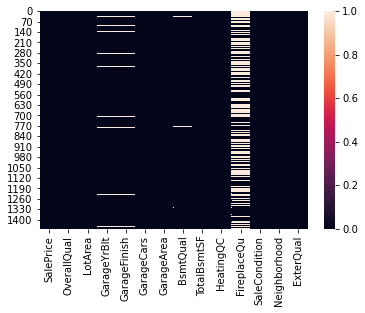

In [113]:
sns.heatmap(model_df.isnull())

In [114]:
#Converting to numerical values
model_df["GarageFinish"] = model_df["GarageFinish"].astype('category').cat.codes
model_df["BsmtQual"] = model_df["BsmtQual"].astype('category').cat.codes
model_df["HeatingQC"] = model_df["HeatingQC"].astype('category').cat.codes
model_df["FireplaceQu"] = model_df["FireplaceQu"].astype('category').cat.codes
model_df["SaleCondition"] = model_df["SaleCondition"].astype('category').cat.codes
model_df["ExterQual"] = model_df["ExterQual"].astype('category').cat.codes
model_df["Neighborhood"] = model_df["Neighborhood"].astype('category').cat.codes

model_df = model_df.fillna(0)
model_df["GarageYrBlt"] = model_df["GarageYrBlt"].astype(int)

<ipython-input-114-6d166395fef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GarageFinish"] = model_df["GarageFinish"].astype('category').cat.codes
<ipython-input-114-6d166395fef2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["BsmtQual"] = model_df["BsmtQual"].astype('category').cat.codes
<ipython-input-114-6d166395fef2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [115]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      1460 non-null   int64
 1   OverallQual    1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   GarageYrBlt    1460 non-null   int64
 4   GarageFinish   1460 non-null   int8 
 5   GarageCars     1460 non-null   int64
 6   GarageArea     1460 non-null   int64
 7   BsmtQual       1460 non-null   int8 
 8   TotalBsmtSF    1460 non-null   int64
 9   HeatingQC      1460 non-null   int8 
 10  FireplaceQu    1460 non-null   int8 
 11  SaleCondition  1460 non-null   int8 
 12  Neighborhood   1460 non-null   int8 
 13  ExterQual      1460 non-null   int8 
dtypes: int64(7), int8(7)
memory usage: 89.9 KB


In [116]:
model_df = model_df[['SalePrice', 'OverallQual', 'LotArea', 'GarageYrBlt', 'GarageCars', 'BsmtQual', 'SaleCondition']]

### CatBoost

In [117]:
X = model_df.drop(["SalePrice"], axis = 1)
y = model_df[["SalePrice"]]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [119]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 529 to 61
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   OverallQual    292 non-null    int64
 1   LotArea        292 non-null    int64
 2   GarageYrBlt    292 non-null    int64
 3   GarageCars     292 non-null    int64
 4   BsmtQual       292 non-null    int8 
 5   SaleCondition  292 non-null    int8 
dtypes: int64(4), int8(2)
memory usage: 12.0 KB


In [120]:
category = ["OverallQual", "GarageYrBlt", "GarageCars", "BsmtQual", "SaleCondition"]

In [121]:
cat_boost = CatBoostRegressor(depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train, cat_features=category)

0:	learn: 74349.4231489	total: 2.74ms	remaining: 2.74s
1:	learn: 70220.3368330	total: 6ms	remaining: 2.99s
2:	learn: 66477.3429496	total: 8.45ms	remaining: 2.81s
3:	learn: 63374.4953703	total: 11.4ms	remaining: 2.84s
4:	learn: 60390.5148829	total: 14.7ms	remaining: 2.92s
5:	learn: 57681.1551423	total: 16.6ms	remaining: 2.76s
6:	learn: 55552.7763518	total: 18.3ms	remaining: 2.6s
7:	learn: 53388.3348871	total: 20.1ms	remaining: 2.49s
8:	learn: 51769.8025918	total: 21.7ms	remaining: 2.38s
9:	learn: 50000.3671034	total: 23.8ms	remaining: 2.36s
10:	learn: 48739.0825018	total: 26.4ms	remaining: 2.37s
11:	learn: 47266.1500136	total: 28.5ms	remaining: 2.35s
12:	learn: 46153.4787671	total: 29.8ms	remaining: 2.26s
13:	learn: 45112.9456797	total: 31ms	remaining: 2.18s
14:	learn: 44048.8476006	total: 32.2ms	remaining: 2.12s
15:	learn: 43186.3893580	total: 33.5ms	remaining: 2.06s
16:	learn: 42486.5156378	total: 34.6ms	remaining: 2s
17:	learn: 41992.9435179	total: 35.7ms	remaining: 1.95s
18:	learn: 

233:	learn: 31311.1964446	total: 314ms	remaining: 1.03s
234:	learn: 31302.0508137	total: 315ms	remaining: 1.03s
235:	learn: 31287.2686717	total: 317ms	remaining: 1.03s
236:	learn: 31273.2510401	total: 319ms	remaining: 1.02s
237:	learn: 31261.1044641	total: 321ms	remaining: 1.03s
238:	learn: 31255.2259527	total: 322ms	remaining: 1.02s
239:	learn: 31228.8415086	total: 324ms	remaining: 1.03s
240:	learn: 31220.5331339	total: 325ms	remaining: 1.02s
241:	learn: 31217.2983743	total: 327ms	remaining: 1.02s
242:	learn: 31210.2374375	total: 328ms	remaining: 1.02s
243:	learn: 31208.6227715	total: 330ms	remaining: 1.02s
244:	learn: 31208.1423916	total: 331ms	remaining: 1.02s
245:	learn: 31198.8294530	total: 332ms	remaining: 1.02s
246:	learn: 31186.5733196	total: 333ms	remaining: 1.01s
247:	learn: 31182.2218001	total: 334ms	remaining: 1.01s
248:	learn: 31177.5878588	total: 335ms	remaining: 1.01s
249:	learn: 31169.4151072	total: 336ms	remaining: 1.01s
250:	learn: 31165.2259452	total: 337ms	remaining

401:	learn: 29635.6539727	total: 492ms	remaining: 731ms
402:	learn: 29634.7256497	total: 493ms	remaining: 731ms
403:	learn: 29627.1913164	total: 495ms	remaining: 730ms
404:	learn: 29610.8729766	total: 496ms	remaining: 729ms
405:	learn: 29605.9212353	total: 497ms	remaining: 728ms
406:	learn: 29605.6054410	total: 499ms	remaining: 728ms
407:	learn: 29601.9085217	total: 501ms	remaining: 727ms
408:	learn: 29582.1075888	total: 503ms	remaining: 727ms
409:	learn: 29551.3541627	total: 504ms	remaining: 725ms
410:	learn: 29547.6593110	total: 505ms	remaining: 724ms
411:	learn: 29537.2353084	total: 507ms	remaining: 723ms
412:	learn: 29532.3216833	total: 508ms	remaining: 722ms
413:	learn: 29531.6206473	total: 509ms	remaining: 720ms
414:	learn: 29521.2471971	total: 510ms	remaining: 718ms
415:	learn: 29519.7204947	total: 511ms	remaining: 717ms
416:	learn: 29497.6745770	total: 512ms	remaining: 716ms
417:	learn: 29477.8366979	total: 514ms	remaining: 716ms
418:	learn: 29475.2825318	total: 515ms	remaining

563:	learn: 28236.7909626	total: 672ms	remaining: 519ms
564:	learn: 28235.7840480	total: 673ms	remaining: 518ms
565:	learn: 28228.3600899	total: 675ms	remaining: 518ms
566:	learn: 28227.0307823	total: 677ms	remaining: 517ms
567:	learn: 28222.8800407	total: 679ms	remaining: 517ms
568:	learn: 28215.9082406	total: 681ms	remaining: 516ms
569:	learn: 28201.9680107	total: 683ms	remaining: 515ms
570:	learn: 28193.2835817	total: 684ms	remaining: 514ms
571:	learn: 28189.0913083	total: 686ms	remaining: 513ms
572:	learn: 28185.4622660	total: 687ms	remaining: 512ms
573:	learn: 28181.6949654	total: 689ms	remaining: 511ms
574:	learn: 28180.1345118	total: 690ms	remaining: 510ms
575:	learn: 28178.7916305	total: 691ms	remaining: 509ms
576:	learn: 28170.2139661	total: 692ms	remaining: 507ms
577:	learn: 28164.3786050	total: 693ms	remaining: 506ms
578:	learn: 28163.0484438	total: 694ms	remaining: 505ms
579:	learn: 28160.3020938	total: 695ms	remaining: 504ms
580:	learn: 28113.3981187	total: 696ms	remaining

717:	learn: 27146.2692655	total: 853ms	remaining: 335ms
718:	learn: 27143.9163628	total: 855ms	remaining: 334ms
719:	learn: 27135.1476167	total: 857ms	remaining: 333ms
720:	learn: 27128.5627450	total: 859ms	remaining: 332ms
721:	learn: 27127.6231345	total: 860ms	remaining: 331ms
722:	learn: 27119.6951336	total: 862ms	remaining: 330ms
723:	learn: 27096.1786660	total: 864ms	remaining: 329ms
724:	learn: 27094.4195259	total: 865ms	remaining: 328ms
725:	learn: 27081.0247789	total: 866ms	remaining: 327ms
726:	learn: 27073.2686427	total: 867ms	remaining: 326ms
727:	learn: 27067.5548031	total: 868ms	remaining: 324ms
728:	learn: 27067.1352106	total: 869ms	remaining: 323ms
729:	learn: 27062.2542551	total: 870ms	remaining: 322ms
730:	learn: 27060.5514162	total: 871ms	remaining: 321ms
731:	learn: 27054.8298718	total: 873ms	remaining: 319ms
732:	learn: 27049.4737178	total: 874ms	remaining: 318ms
733:	learn: 27048.6760154	total: 875ms	remaining: 317ms
734:	learn: 27044.3521658	total: 876ms	remaining

878:	learn: 26170.0227545	total: 1.06s	remaining: 146ms
879:	learn: 26165.8729746	total: 1.06s	remaining: 145ms
880:	learn: 26162.4298746	total: 1.06s	remaining: 144ms
881:	learn: 26145.0069437	total: 1.07s	remaining: 143ms
882:	learn: 26135.5059325	total: 1.07s	remaining: 142ms
883:	learn: 26132.1065053	total: 1.07s	remaining: 141ms
884:	learn: 26130.6808565	total: 1.07s	remaining: 139ms
885:	learn: 26123.6177369	total: 1.08s	remaining: 139ms
886:	learn: 26121.1239294	total: 1.08s	remaining: 137ms
887:	learn: 26118.1529267	total: 1.08s	remaining: 136ms
888:	learn: 26109.4926818	total: 1.08s	remaining: 135ms
889:	learn: 26104.2164967	total: 1.08s	remaining: 134ms
890:	learn: 26103.5125034	total: 1.08s	remaining: 133ms
891:	learn: 26101.6164793	total: 1.09s	remaining: 132ms
892:	learn: 26097.8413400	total: 1.09s	remaining: 131ms
893:	learn: 26097.2833569	total: 1.09s	remaining: 129ms
894:	learn: 26088.4609885	total: 1.09s	remaining: 128ms
895:	learn: 26085.4348487	total: 1.09s	remaining

In [122]:
y_pred = cat_boost.predict(X_test)

In [123]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,205555.158599
1,133000,135732.002413
2,110000,126498.851260
3,192000,201394.404897
4,88000,98437.640006


In [124]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

44608.10818377878

In [125]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.06579366988757931

In [126]:
new_main_df.drop(["SalePrice"], axis = 1).columns.values

array(['Id', 'OverallQual', 'OverallCond', 'LotArea', 'YearBuilt',
       'Street', 'LotShape'], dtype=object)

In [127]:
list(cat_boost.get_feature_importance(Pool(X_test, label = y_test, cat_features=category)))

[47.61532335272795,
 17.350076739614043,
 6.206277537368164,
 14.884687558223245,
 10.854260468195832,
 3.089374343870654]

#### We can see that the model is not predicting the higher Actual value houses very well. There might be additional features that we can include to help with higher valued houses

In [128]:
df[df["Actual"] > 400000]

,Actual,Predicted
8,745000,446146.480646
44,403000,335500.262055
50,412500,374551.089896
126,415298,426309.358304
253,438780,410889.493154
258,538000,345980.840239
288,555000,385217.433046


### Deploy model

In [129]:
import pickle 
pickle_out = open("catboost_updated3.pkl", "wb") 
pickle.dump(cat_boost, pickle_out) 
pickle_out.close()